In [2]:
import pandas as pd
import numpy as np 
import pickle
import os

import seaborn as sns
import yellowbrick as yb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pickle.load(open("wrangled_df.pkl", "rb"))

In [4]:
df.shape

(107380, 110)

In [5]:
df.head(10)

,household_id2,individual_id2,zone_code,hh_member_relationship,sex_of_hh_member,marital_status,hours_per_week_agg,hours_per_week_other_jobs,hours_per_week_collect_water,pw_w3,...,crop_name_cat,highest_grade_cat,hh_size_cat,ages_cat,hh_mem_rel_cat,who_decides_use_crops_cat,adv_services_cat,ext_program_cat,marital_stat_cat,region_cat
0,1.010109e+16,1.010109e+18,1.0,1.0,2.0,6.0,0.0,0.0,0.0,2897.155029,...,MAIZE,0-5th Grade,More than 6_HH_Members,Over 21,head,adult_females,no,yes,never_married,north
1,1.010109e+16,1.010109e+18,1.0,1.0,2.0,6.0,0.0,0.0,0.0,2897.155029,...,SORGHUM,0-5th Grade,More than 6_HH_Members,Over 21,head,adult_females,no,yes,never_married,north
2,1.010109e+16,1.010109e+18,1.0,2.0,2.0,2.0,0.0,0.0,0.0,2897.155029,...,SESAME,0-5th Grade,More than 6_HH_Members,Over 21,spouse,adult_females,yes,yes,married_mono,north
3,1.010109e+16,1.010109e+18,1.0,2.0,2.0,2.0,0.0,0.0,0.0,2897.155029,...,SORGHUM,0-5th Grade,More than 6_HH_Members,Over 21,spouse,adult_females,yes,yes,married_mono,north
4,1.010109e+16,1.010109e+18,1.0,2.0,2.0,2.0,0.0,0.0,0.0,2897.155029,...,SESAME,0-5th Grade,More than 6_HH_Members,Over 21,spouse,adult_females,yes,yes,married_mono,north
5,1.010109e+16,1.010109e+18,1.0,2.0,2.0,2.0,0.0,0.0,0.0,2897.155029,...,SORGHUM,0-5th Grade,More than 6_HH_Members,Over 21,spouse,adult_females,yes,yes,married_mono,north
6,1.010109e+16,1.010109e+18,1.0,2.0,2.0,2.0,0.0,0.0,0.0,2897.155029,...,MAIZE,0-5th Grade,More than 6_HH_Members,Over 21,spouse,adult_females,yes,yes,married_mono,north
7,1.010109e+16,1.010109e+18,1.0,2.0,2.0,2.0,0.0,0.0,0.0,2897.155029,...,SORGHUM,0-5th Grade,More than 6_HH_Members,Over 21,spouse,adult_females,yes,yes,married_mono,north
8,1.010109e+16,1.010109e+18,1.0,2.0,2.0,2.0,0.0,0.0,0.0,2897.155029,...,MAIZE,0-5th Grade,More than 6_HH_Members,Over 21,spouse,adult_females,yes,yes,married_mono,north
9,1.010109e+16,1.010109e+18,1.0,2.0,2.0,2.0,0.0,0.0,0.0,2897.155029,...,SORGHUM,0-5th Grade,More than 6_HH_Members,Over 21,spouse,adult_females,yes,yes,married_mono,north


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107380 entries, 0 to 112574
Columns: 110 entries, household_id2 to region_cat
dtypes: category(5), float64(99), object(6)
memory usage: 87.4+ MB


###### Relevant for Hours

In [7]:
cols=["crop_name_cat", "total_hours_cat", "highest_grade_cat",
      "hh_mem_rel_cat", "adv_services_cat",
      "ext_program_cat", "who_decides_use_crops_cat", "marital_stat_cat", 
      "ages_cat", "hh_size_cat", "region_cat", "sex_of_hh_member"
     ]     

In [8]:
newdf = df[cols]

In [9]:
newdf.columns

Index(['crop_name_cat', 'total_hours_cat', 'highest_grade_cat',
       'hh_mem_rel_cat', 'adv_services_cat', 'ext_program_cat',
       'who_decides_use_crops_cat', 'marital_stat_cat', 'ages_cat',
       'hh_size_cat', 'region_cat', 'sex_of_hh_member'],
      dtype='object')

In [10]:
newdf.isnull().describe()

,crop_name_cat,total_hours_cat,highest_grade_cat,hh_mem_rel_cat,adv_services_cat,ext_program_cat,who_decides_use_crops_cat,marital_stat_cat,ages_cat,hh_size_cat,region_cat,sex_of_hh_member
count,107380,107380,107380,107380,107380,107380,107380,107380,107380,107380,107380,107380
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False
freq,91231,91231,86264,91231,91231,91231,91231,91184,91231,91231,91231,91231


In [11]:
x = newdf.dropna(axis=0)

In [12]:
x.shape

(71087, 12)

In [13]:
x.head()

,crop_name_cat,total_hours_cat,highest_grade_cat,hh_mem_rel_cat,adv_services_cat,ext_program_cat,who_decides_use_crops_cat,marital_stat_cat,ages_cat,hh_size_cat,region_cat,sex_of_hh_member
0,MAIZE,0 Hours,0-5th Grade,head,no,yes,adult_females,never_married,Over 21,More than 6_HH_Members,north,2.0
1,SORGHUM,0 Hours,0-5th Grade,head,no,yes,adult_females,never_married,Over 21,More than 6_HH_Members,north,2.0
2,SESAME,0 Hours,0-5th Grade,spouse,yes,yes,adult_females,married_mono,Over 21,More than 6_HH_Members,north,2.0
3,SORGHUM,0 Hours,0-5th Grade,spouse,yes,yes,adult_females,married_mono,Over 21,More than 6_HH_Members,north,2.0
4,SESAME,0 Hours,0-5th Grade,spouse,yes,yes,adult_females,married_mono,Over 21,More than 6_HH_Members,north,2.0


In [14]:
x["sex_of_hh_member"] = x["sex_of_hh_member"].astype("category", copy=False)

/Users/dominic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
x.describe()

,crop_name_cat,total_hours_cat,highest_grade_cat,hh_mem_rel_cat,adv_services_cat,ext_program_cat,who_decides_use_crops_cat,marital_stat_cat,ages_cat,hh_size_cat,region_cat,sex_of_hh_member
count,71087,71087,71087,71087,71087,71087,71087,71087,71087,71087,71087,71087.0
unique,54,5,2,15,2,2,7,6,2,2,2,1.0
top,MAIZE,0 Hours,0-5th Grade,child,yes,yes,adult_females,married_mono,Over 21,More than 6_HH_Members,south,2.0
freq,14517,36913,60150,33451,53666,39553,36854,29614,37069,48348,43638,71087.0


###### So I messed up.... kinda

Some of the data in the dataset was already given an integer representing it's categorical status.

I converted all of these to the string representation so I could turn them back apparently.

However, some of the variables do need to follow the following transformations so not all is wasted

In [16]:
def inv_cat_cols(col, keys):
    values = []
    i=0
    while i <len(keys):
        i=i+1
        values.append(i)
    d=dict(zip(keys, values))

    newlist=[]
    for j in col:
        for k, vals in d.items():
            if j == k:
                newlist.append(vals)
                
    newlist=pd.DataFrame(newlist)
    return newlist

In [17]:
def get_keys(col):
    x = []
    for i in col.unique():
        x.append(i)
    return x

###### List to iterate over to attempt to make things easy

In [18]:
th_keys=[]
cn_keys=[]
hg_keys=[]
hhmem_keys=[]
as_keys=[]
ep_keys=[]
wd_keys=[]
ms_keys=[]
a_keys=[]
hhs_keys=[]
r_keys=[]

key_names = [th_keys, cn_keys, hg_keys, hhmem_keys, as_keys, 
             ep_keys, wd_keys, ms_keys, a_keys, hhs_keys, r_keys
            ]
col_names = [x["total_hours_cat"], x["crop_name_cat"],
             x["highest_grade_cat"], x["hh_mem_rel_cat"],
             x["adv_services_cat"], x["ext_program_cat"], 
             x["who_decides_use_crops_cat"], 
             x["marital_stat_cat"], x["ages_cat"], 
             x["hh_size_cat"], x["region_cat"]
            ]


###### Finds unique values within each column and makes them the key

In [19]:
i = 0
while i <len(key_names):
    key_names[i]=get_keys(col_names[i])
    i = i + 1

###### Creates a list of dataframes containing the integer representation of the categories

In [20]:
invdf=[]
i=0
while i <len(key_names):
    invdf.append(inv_cat_cols(col_names[i], key_names[i]))
    i=i+1
    

###### Concatenate the Results

Now that we have a list of dataframes, we can concatenate them into one

In [21]:
invdf = pd.concat(invdf, axis=1)

In [22]:
invdf.columns=["total_hours_cat", "crop_name_cat", 
               "highest_grade_cat", "hh_mem_rel_cat", 
               "adv_services_cat", "ext_program_cat", 
               "who_decides_use_crops_cat",
               "marital_stat_cat", "ages_cat", 
               "hh_size_cat", "region_cat"
              ]
invdf.head()

,total_hours_cat,crop_name_cat,highest_grade_cat,hh_mem_rel_cat,adv_services_cat,ext_program_cat,who_decides_use_crops_cat,marital_stat_cat,ages_cat,hh_size_cat,region_cat
0,1,1,1,1,1,1,1,1,1,1,1
1,1,2,1,1,1,1,1,1,1,1,1
2,1,3,1,2,2,1,1,2,1,1,1
3,1,2,1,2,2,1,1,2,1,1,1
4,1,3,1,2,2,1,1,2,1,1,1


###### Now that the data has integer representations 

It has to be designated as a categorical value

In [23]:
for i in invdf.columns:
    invdf[i] = invdf[i].astype("category", copy=False)

invdf.shape

In [24]:
invdf.describe()

,total_hours_cat,crop_name_cat,highest_grade_cat,hh_mem_rel_cat,adv_services_cat,ext_program_cat,who_decides_use_crops_cat,marital_stat_cat,ages_cat,hh_size_cat,region_cat
count,71087,71087,71087,71087,71087,71087,71087,71087,71087,71087,71087
unique,5,54,2,15,2,2,7,6,2,2,2
top,1,1,1,3,2,1,1,2,1,1,2
freq,36913,14517,60150,33451,53666,39553,36854,29614,37069,48348,43638


###### Look at data dist

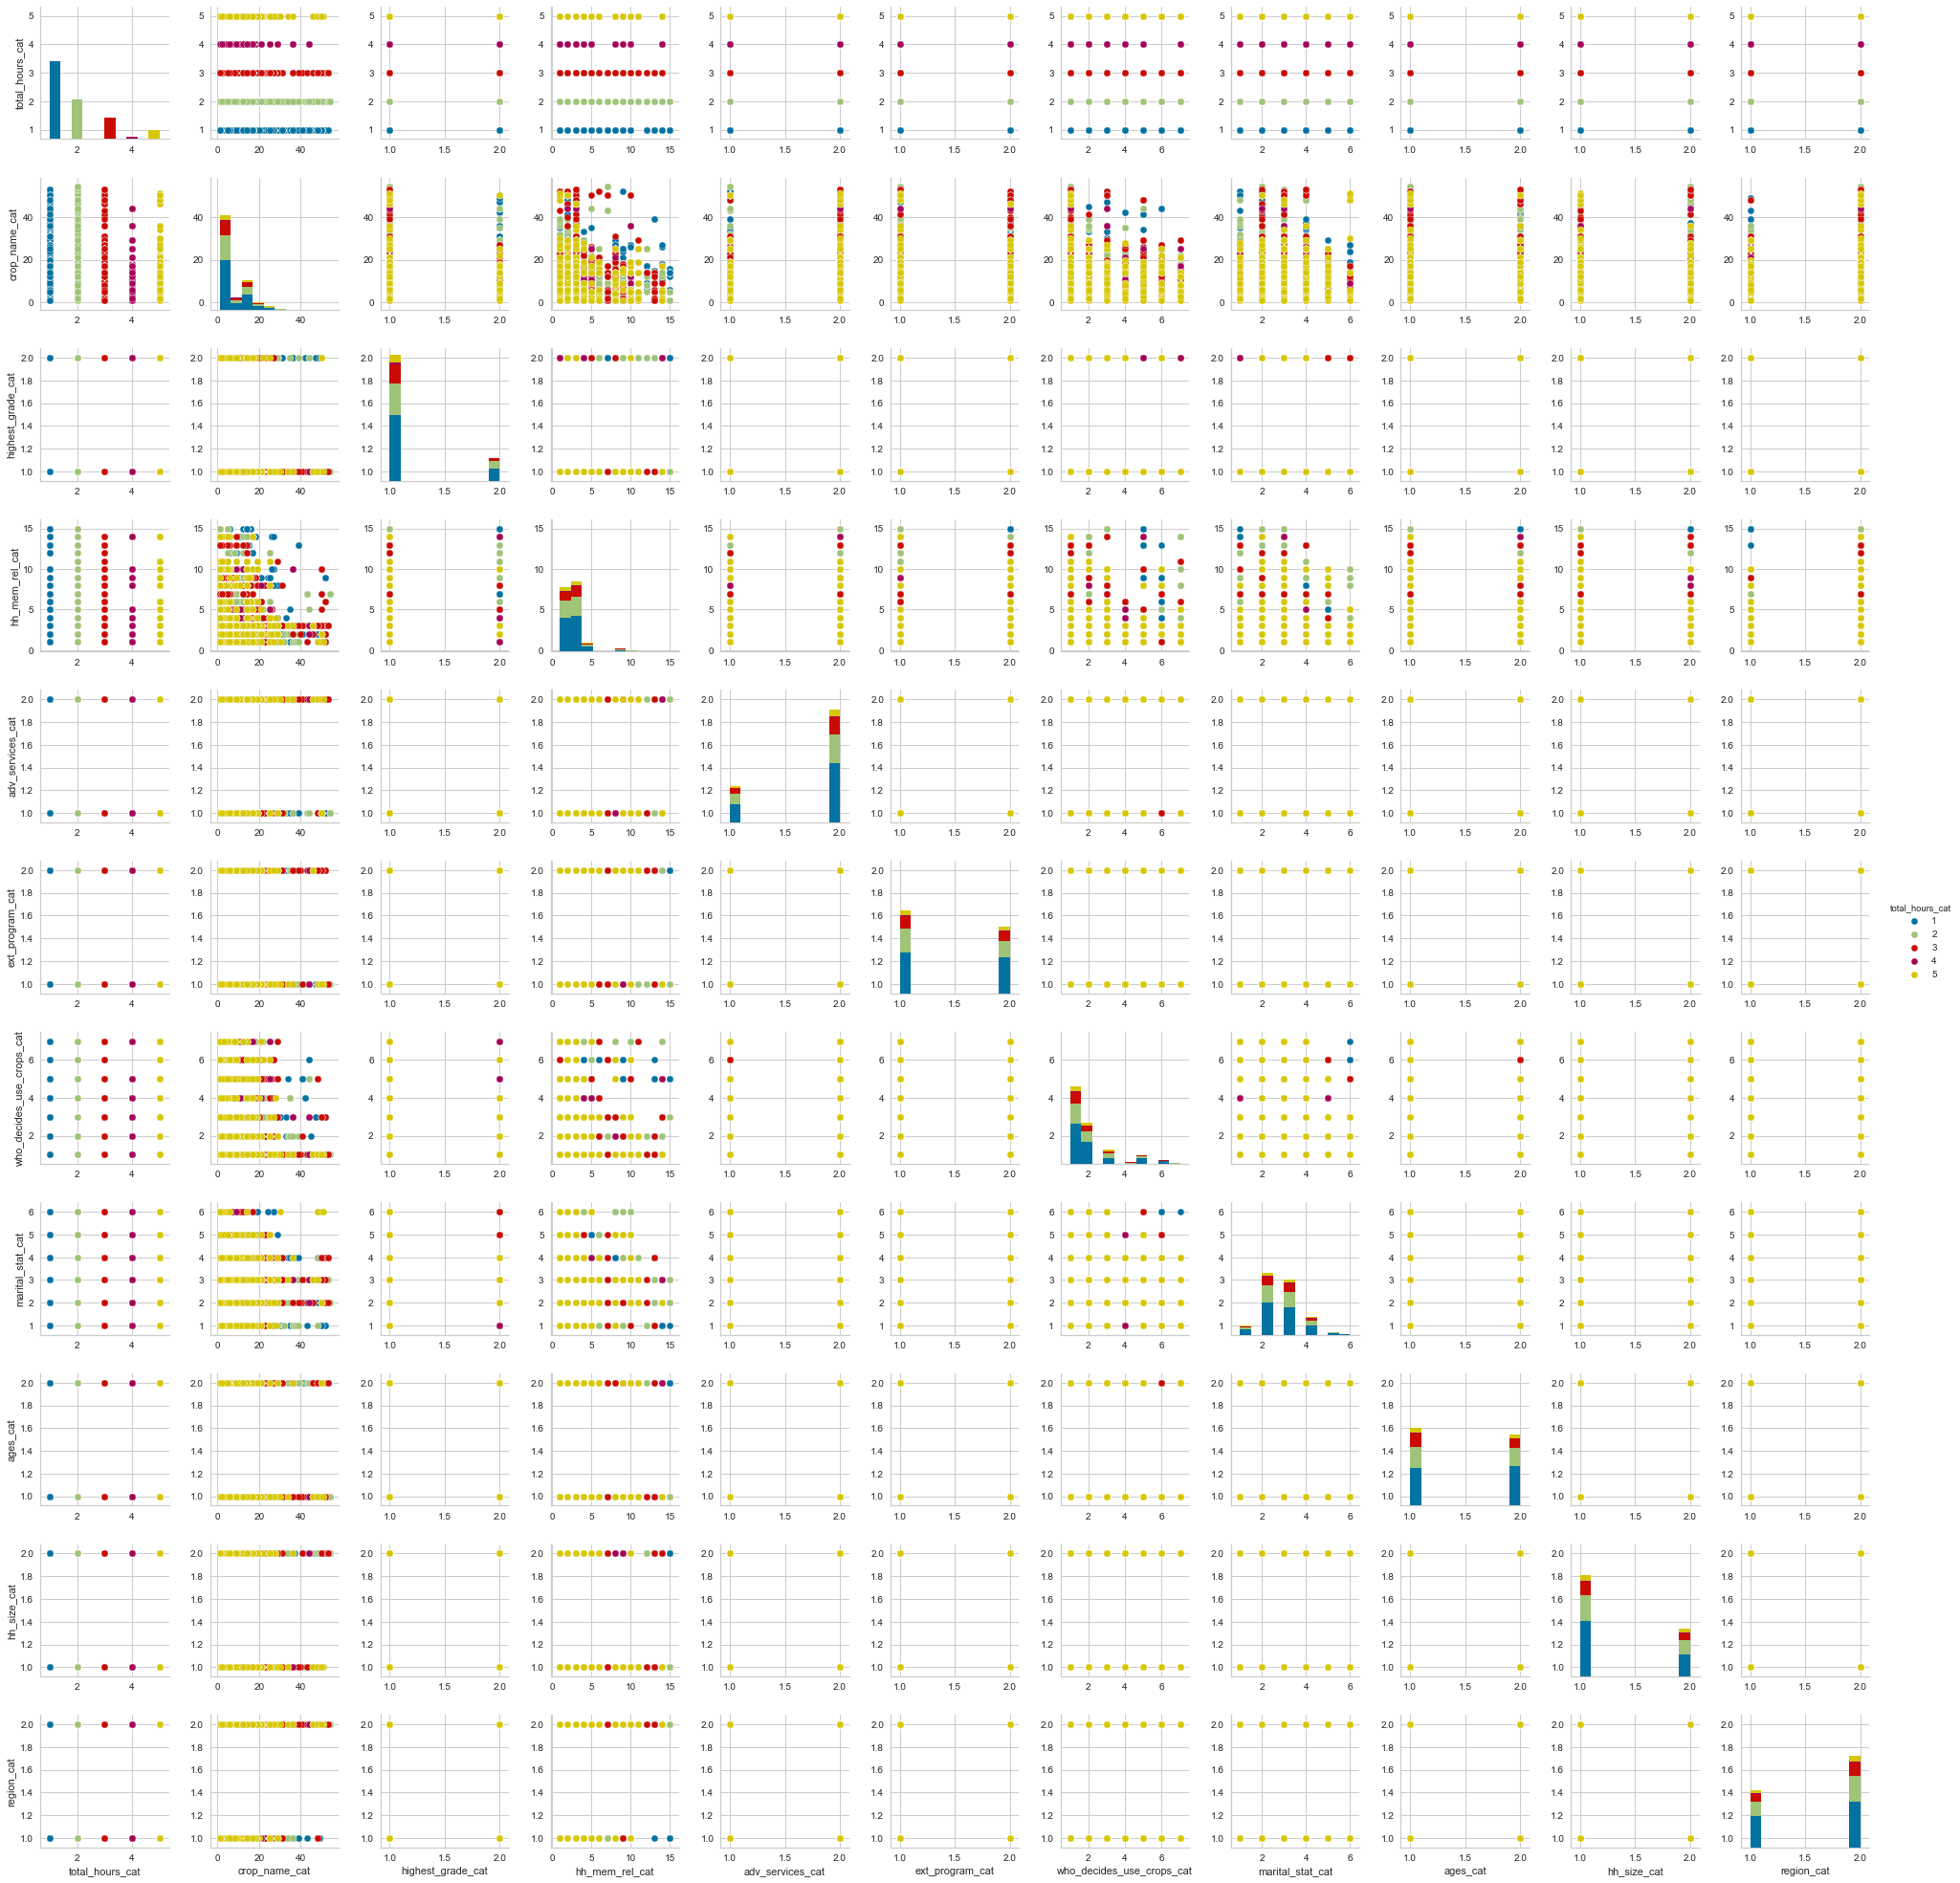

In [25]:
g  = sns.pairplot(data = invdf, dropna=True, hue="total_hours_cat")

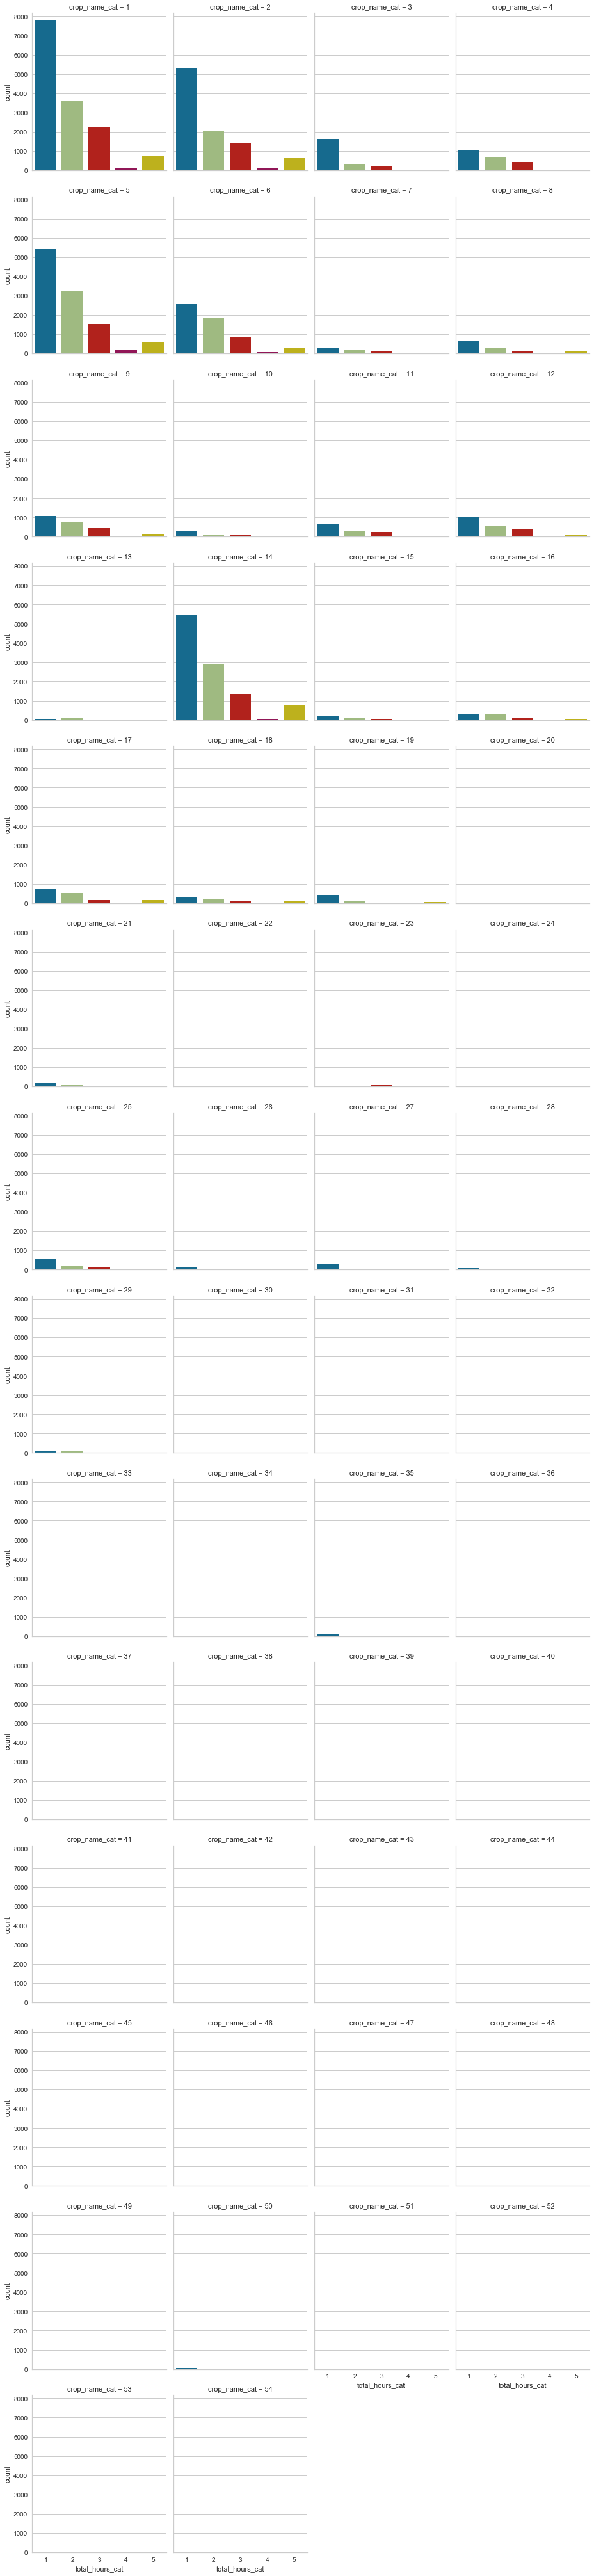

In [27]:
g = sns.factorplot("total_hours_cat", col="crop_name_cat", col_wrap=4, data=invdf, 
                   kind="count", size=4, aspect=.8)



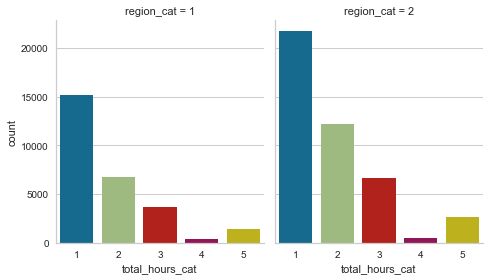

In [29]:
g = sns.factorplot("total_hours_cat", col="region_cat", col_wrap=4, data=invdf, 
                   kind="count", size=4, aspect=.8)



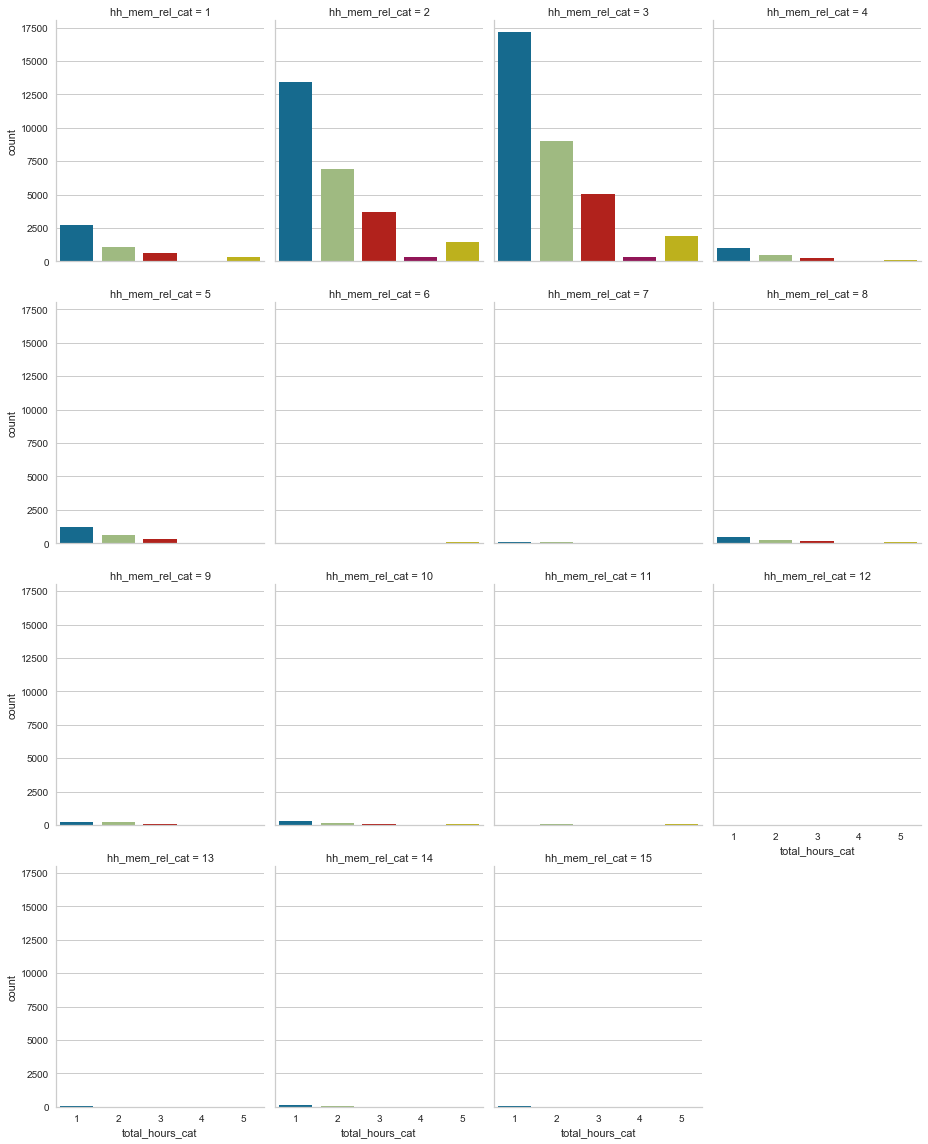

In [30]:
g = sns.factorplot("total_hours_cat", col="hh_mem_rel_cat", col_wrap=4, data=invdf, 
                   kind="count", size=4, aspect=.8)



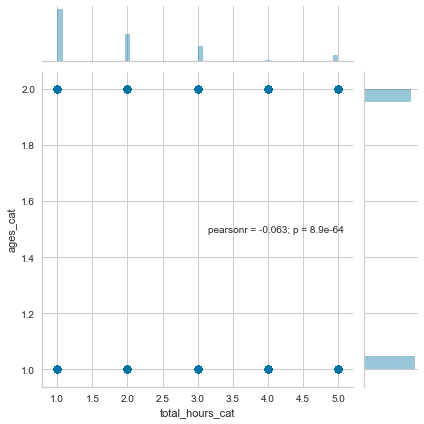

In [31]:
g = sns.jointplot("total_hours_cat", "ages_cat", invdf)

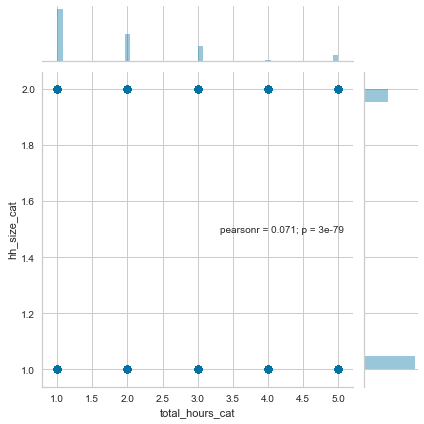

In [32]:
g = sns.jointplot("total_hours_cat", "hh_size_cat", invdf)

###### Look for Separability

In [33]:
invdf = invdf.dropna(axis=0)
invdf.shape

(71087, 11)

/Users/dominic/anaconda3/lib/python3.6/site-packages/pandas/plotting/_misc.py:201: RuntimeWarning: invalid value encountered in true_divide
  y = (s * row_).sum(axis=0) / row.sum()


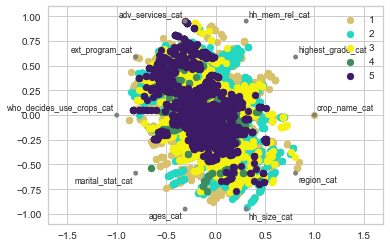

In [34]:
from pandas.plotting import radviz

plt.figure()
radviz(invdf, "total_hours_cat")

In [35]:
invdf_sam = invdf.sample(frac=0.4, replace=True)
invdf_sam.head()

,total_hours_cat,crop_name_cat,highest_grade_cat,hh_mem_rel_cat,adv_services_cat,ext_program_cat,who_decides_use_crops_cat,marital_stat_cat,ages_cat,hh_size_cat,region_cat
22799,1,25,2,2,2,2,1,2,2,1,1
5646,1,14,2,4,2,1,2,4,2,1,1
35076,1,12,1,3,1,2,1,2,1,1,2
22557,2,3,1,3,2,1,1,2,1,1,1
7820,1,2,2,2,2,2,3,2,1,2,1


In [36]:
invdf_sam.shape

(28435, 11)

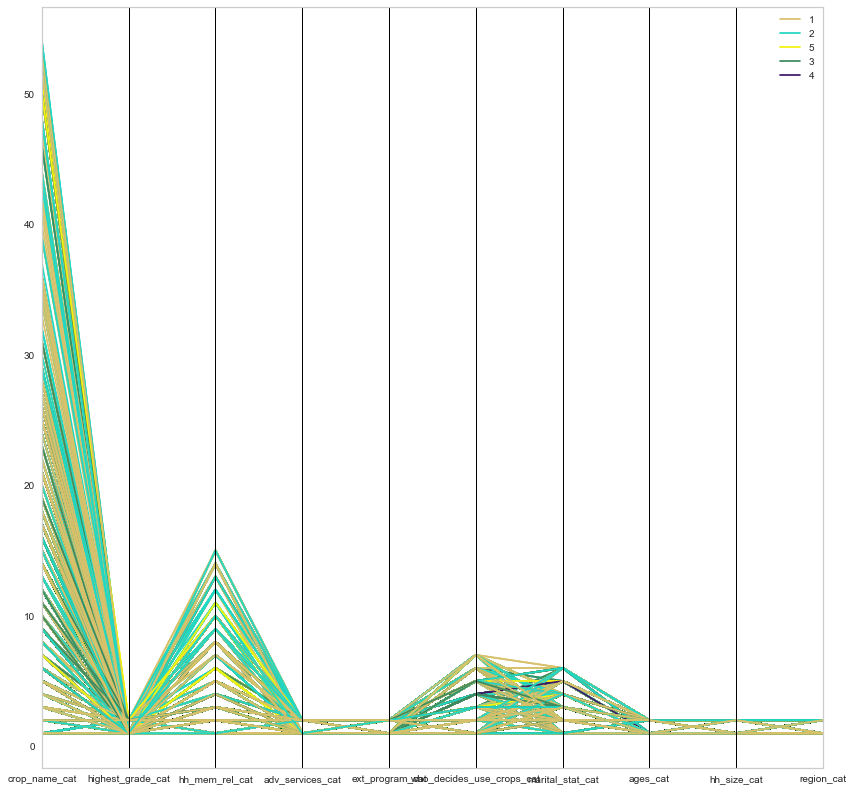

In [37]:
import matplotlib as mpl
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(14,14))
mpl.rcParams.update({'font.size': 25})

parallel_coordinates(invdf_sam, "total_hours_cat")

###### Encode Target & Features

In [38]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
y=encoder.fit(invdf["total_hours_cat"])
print(y.classes_)

[1 2 3 4 5]


In [39]:
y.transform(invdf["total_hours_cat"])

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin 

class DataEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            raise TypeError(
                "This transformer only knows how to handle data frames!"
            )
        
        self.encoders = [
            LabelEncoder().fit(X[column])
            for column in X.columns
        ]
        return self
    
    def transform(self, X):
        for idx, column in enumerate(X.columns):
            X[column] = self.encoders[idx].transform(X[column])
        return X
    
    def inverse_transform(self, X):
        for idx, column in enumerate(X.columns):
            X[column] = self.encoders[idx].inverse_transform(X[column])
        return X

In [41]:
y = invdf.pop("total_hours_cat")
y = pd.DataFrame(y)
y.columns = ["total_hours_cat"]
X = invdf

In [42]:
X.columns

Index(['crop_name_cat', 'highest_grade_cat', 'hh_mem_rel_cat',
       'adv_services_cat', 'ext_program_cat', 'who_decides_use_crops_cat',
       'marital_stat_cat', 'ages_cat', 'hh_size_cat', 'region_cat'],
      dtype='object')

In [43]:
Xencoder = DataEncoder()
yencoder = LabelEncoder()
X = Xencoder.fit_transform(X)
y = yencoder.fit_transform(np.ravel(y))

###### Model Selection & Evaluation

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

###### Model Selection Function

Takes in the features and target data along with the specified model that you want to run

In [45]:
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn import cross_validation as cv
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import train_test_split as tts
from sklearn.cross_validation import KFold

y_labels = key_names[0]

def model_selection(X, y, estimator):
    
    X = X.as_matrix()
    
    X_train, X_test, y_train, y_test = tts(X,y,test_size=0.25)
    
    model = estimator
    #model.fit(X_train, y_train)
    #model.score(X_test, y_test)
    #y_preds = model.predict(X)
    #return classification_report(y, y_pred=y_preds, target_names = y_labels)
    
    visualizer = ClassificationReport(model, classes = y_labels)
    
    visualizer.fit(X_train,y_train)
    
    visualizer.score(X_test,y_test)
    visualizer.poof()

/Users/dominic/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [46]:
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn import cross_validation as cv
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import train_test_split as tts
from sklearn.cross_validation import KFold

y_labels = key_names[0]

def get_ypreds(X, y, estimator):
    
    X = X.as_matrix()
    
    X_train, X_test, y_train, y_test = tts(X,y,test_size=0.25)
    
    model = estimator
    model.fit(X_train, y_train)
    model.score(X_test, y_test)
    y_preds = model.predict(X)
    return y_preds

###### This takes a while

In [47]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=6)
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.25)

model.fit(X,y)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [49]:
model.score(X_test,y_test)

0.66762322754895342

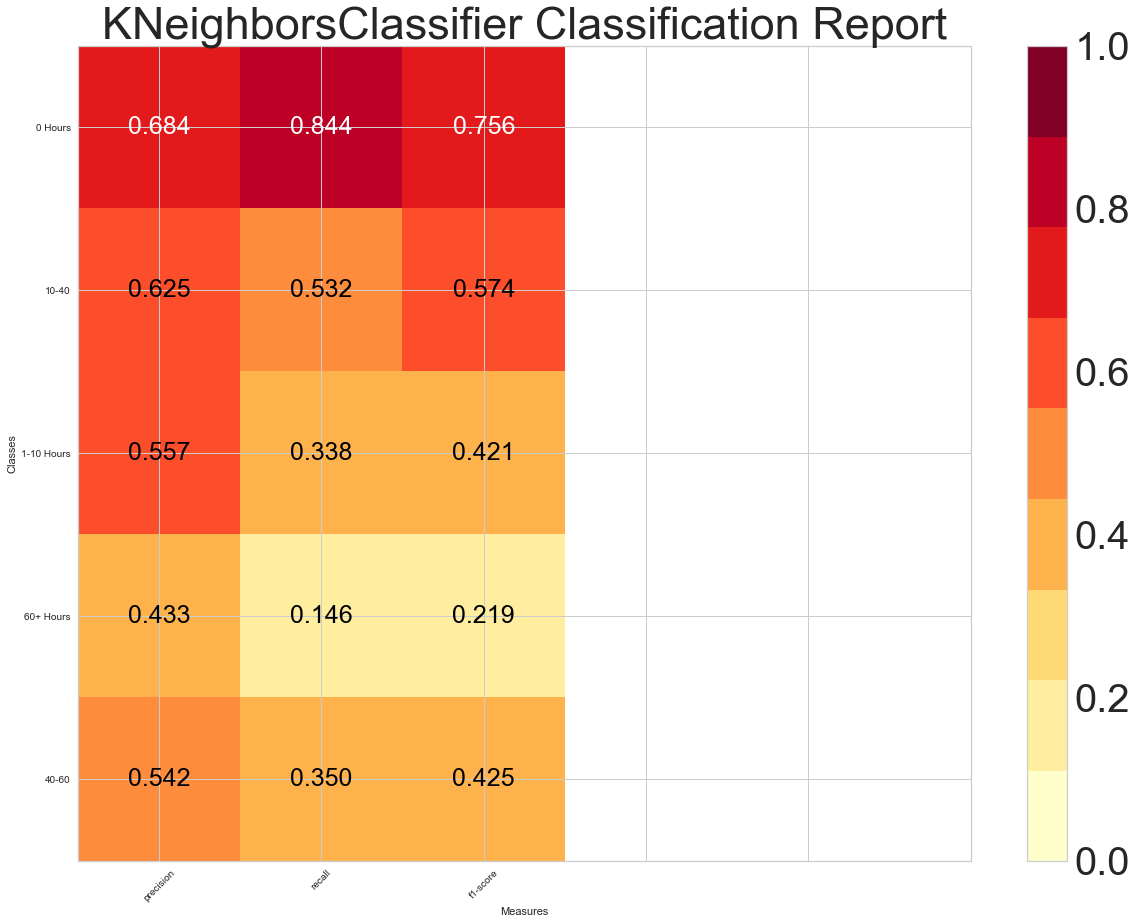

In [51]:
import matplotlib as mpl

plt.figure(figsize=(20,15))
plt.autoscale(enable=True, axis="x", tight=True)
mpl.rcParams.update({'font.size': 25, "axes.labelsize":50,
                     "xtick.labelsize": 40, "ytick.labelsize": 40, 
                     "axes.titlesize": 45})

plt.savefig("knn.pdf")

model_selection(X,y, KNeighborsClassifier(n_neighbors=6))

In [53]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.70144046815214944

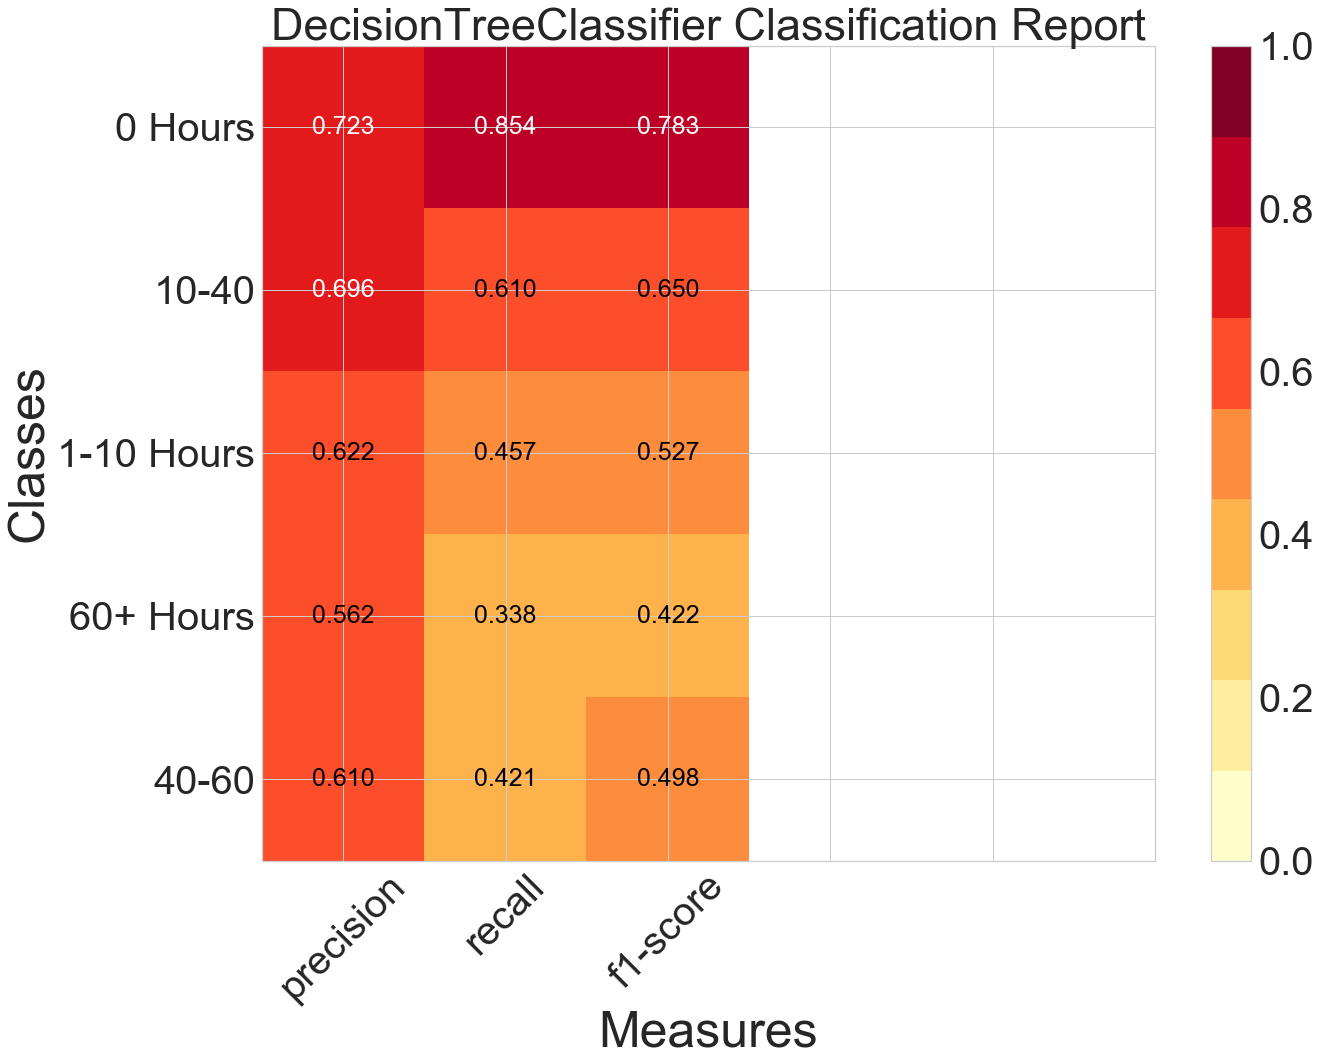

In [54]:
plt.figure(figsize=(20,15))
plt.autoscale(enable=True, axis="x", tight=True)
mpl.rcParams.update({'font.size': 25, "axes.labelsize":50,
                     "xtick.labelsize": 40, "ytick.labelsize": 40, 
                     "axes.titlesize": 45})

plt.savefig("dtc.pdf")

model_selection(X, y, DecisionTreeClassifier())

In [55]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.70318478505514292

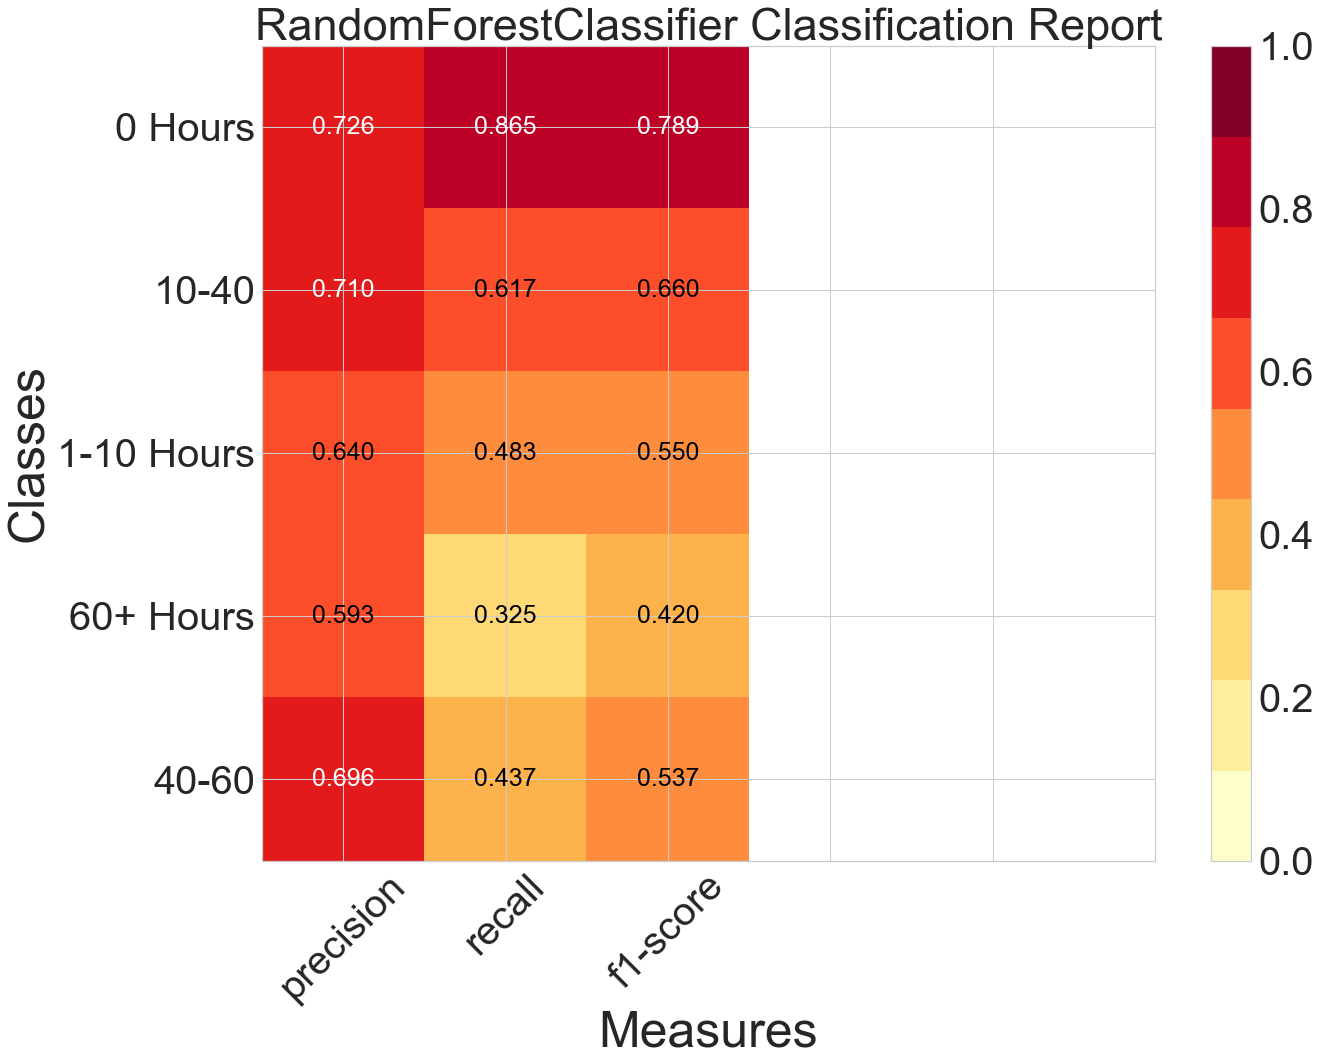

In [56]:
plt.figure(figsize=(20,15))
plt.autoscale(enable=True, axis="x", tight=True)
mpl.rcParams.update({'font.size': 25, "axes.labelsize":50,
                     "xtick.labelsize": 40, "ytick.labelsize": 40, 
                     "axes.titlesize": 45})

plt.savefig("rfc.pdf")

model_selection(X, y, RandomForestClassifier())

In [57]:
from sklearn.svm import SVC

model=SVC(kernel="rbf")
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.57050416385325231

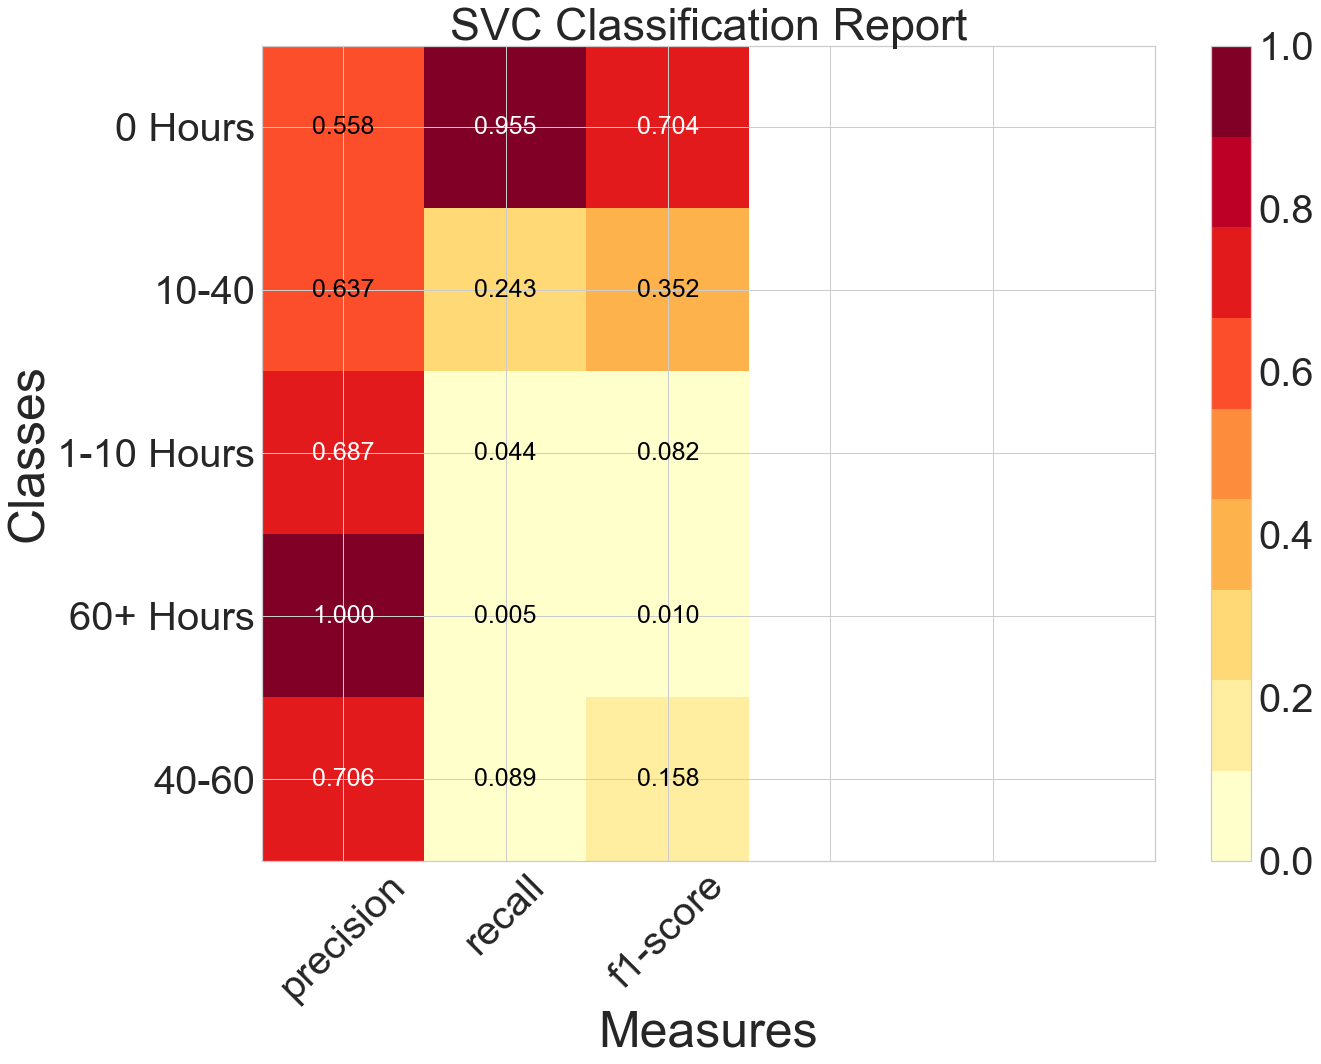

In [58]:
from sklearn.svm import SVC

plt.figure(figsize=(20,15))
plt.autoscale(enable=True, axis="x", tight=True)
mpl.rcParams.update({'font.size': 25, "axes.labelsize":50,
                     "xtick.labelsize": 40, "ytick.labelsize": 40, 
                     "axes.titlesize": 45})

svm_preds = model_selection(X, y, SVC(kernel="rbf"))

In [59]:
model = BaggingClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.70262210218320953

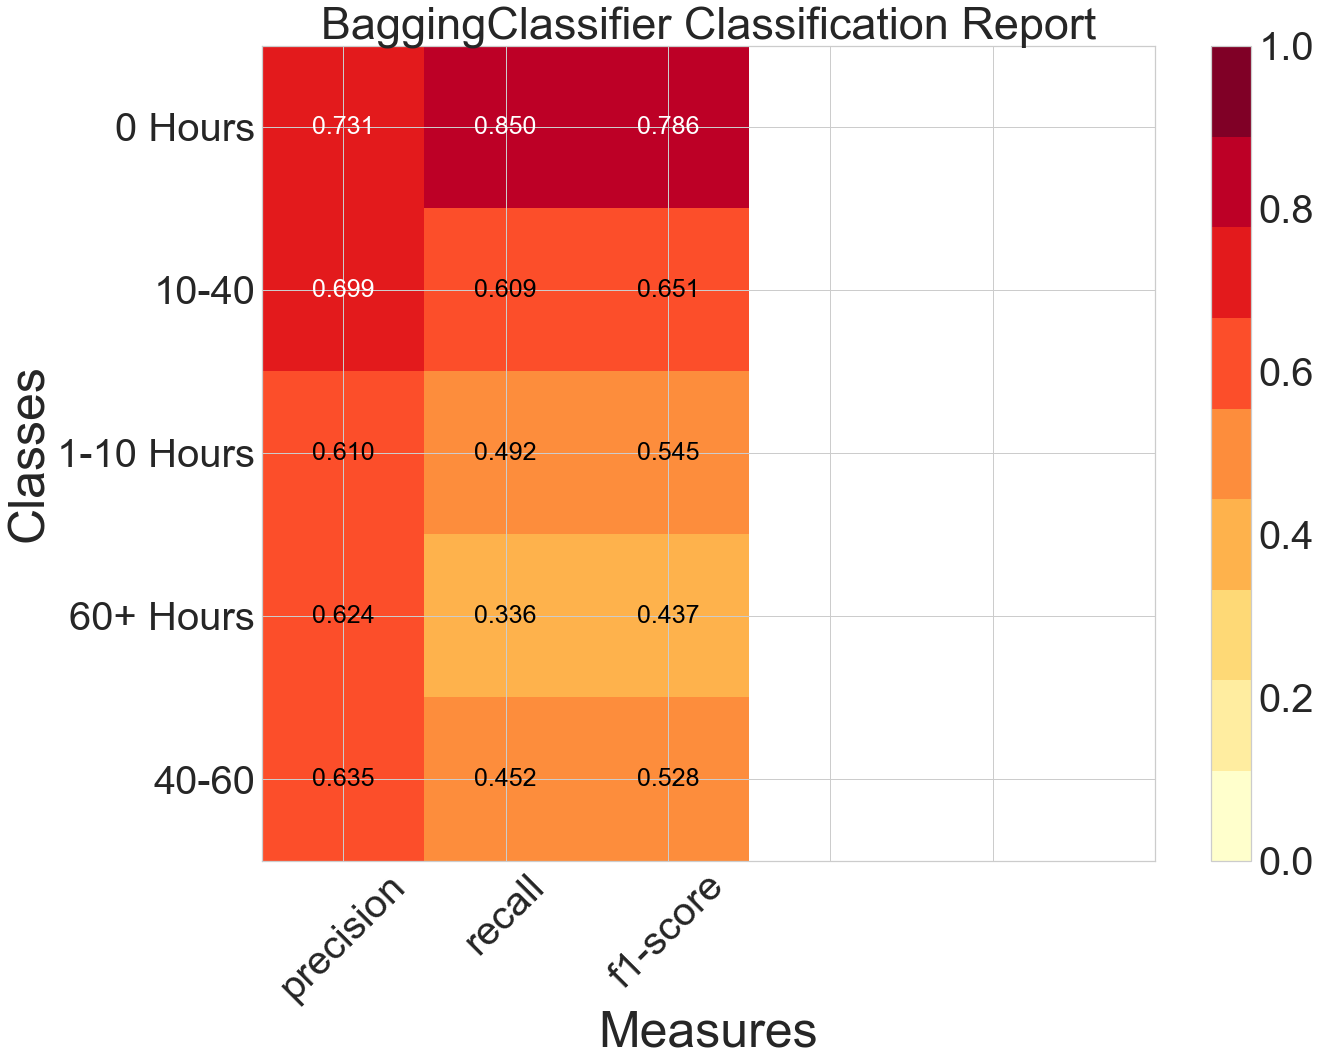

In [60]:
plt.figure(figsize=(20,15))
plt.autoscale(enable=True, axis="x", tight=True)
mpl.rcParams.update({'font.size': 25, "axes.labelsize":50,
                     "xtick.labelsize": 40, "ytick.labelsize": 40, 
                     "axes.titlesize": 45})

plt.savefig("bc.pdf")

model_selection(X,y, BaggingClassifier())

ValueError: query data dimension must match training data dimension

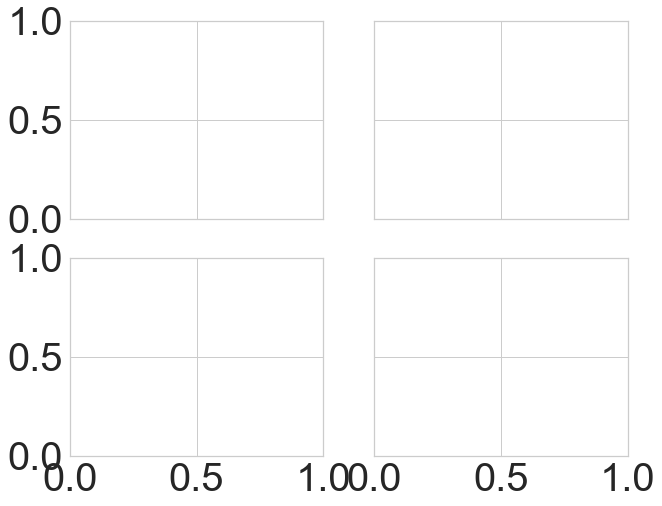

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from itertools import product

clf1 = KNeighborsClassifier(n_neighbors=6)
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4 = SVC(kernel="rbf")
clf5 = BaggingClassifier()
clfs = [clf1, clf2, clf3, clf4, clf5]

for clf in clfs:
    clf.fit(X,y)
    
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, clf4],
                        ['KNN k=15', 'Decision Tree',
                         'Random Forest Classifier',
                         'SVC-RBF']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

#model_selection(X_train, y_train, LinearRegression())

In [ ]:
from sklearn.linear_model import Perceptron

#model_selection(X_train, y_train, Perceptron())

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#model_selection(X_train, y_train, KNeighborsRegressor())

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#model_selection(X_train, y_train, DecisionTreeRegressor())

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#model_selection(X_train, y_train, RandomForestRegressor())

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

#model_selection(X_train,y_train, AdaBoostRegressor())

###### Relevant for Predicting Crop Values

In [ ]:
dfg = pd.concat([invdf, y_preds])
dfg.shape

In [ ]:
dfg.describe()

In [ ]:
dfg.info()